In [42]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

In [24]:
plt.style.use("ggplot")

In [175]:
BASE_FOLDER = "dice_loss_vs_combined_unet"

In [185]:
files = sorted(glob.glob(BASE_FOLDER + "/*.csv"))

for i, f in enumerate(files):
    print(i, ":", os.path.basename(f))

0 : run-Mar27_01-45-28_diracDRIVE-unet-BatchNorm-combinedLoss-antialias-cust-tag-Train_Dice_score.csv
1 : run-Mar27_01-45-28_diracDRIVE-unet-BatchNorm-combinedLoss-antialias-cust-tag-Validation_AUC.csv
2 : run-Mar27_01-45-28_diracDRIVE-unet-BatchNorm-combinedLoss-antialias-cust-tag-Validation_Dice_score.csv
3 : run-Mar27_10-37-40_diracDRIVE-unet-BatchNorm-diceLoss-antialias-tag-Train_Dice_score.csv
4 : run-Mar27_10-37-40_diracDRIVE-unet-BatchNorm-diceLoss-antialias-tag-Validation_AUC.csv
5 : run-Mar27_10-37-40_diracDRIVE-unet-BatchNorm-diceLoss-antialias-tag-Validation_Dice_score.csv
6 : run-Mar27_15-16-43_diracDRIVE-unet-BatchNorm-crossentropyLoss-antialias-tag-Train_Dice_score.csv
7 : run-Mar27_15-16-43_diracDRIVE-unet-BatchNorm-crossentropyLoss-antialias-tag-Validation_AUC.csv
8 : run-Mar27_15-16-43_diracDRIVE-unet-BatchNorm-crossentropyLoss-antialias-tag-Validation_Dice_score.csv


In [186]:
dfs = {f: pd.read_csv(f) for f in files}

In [187]:
metric_keys = ['Train_Dice', 'Validation_Dice', 'Validation_AUC']
labels = {
#    'antialias-t': '20/80 whole image/crops',
#    'morewhole': '50/50 whole image/crops'
    'combinedLoss': 'Combined CE + Dice loss',
    'diceLoss': '(Soft) Dice loss',
    'crossentropyLoss': 'Cross-entropy loss'
}
methods_ = list(labels.keys())

In [188]:
big_dico = {}
for metr in metric_keys:
    big_dico[metr] = {
        meth: dfs[f]
        for meth in methods_
        for f in files
        if meth in f and metr in f and 'DRIVE' in f
    }

In [189]:
print(big_dico.keys())
print(big_dico[list(big_dico.keys())[0]].keys())

dict_keys(['Train_Dice', 'Validation_Dice', 'Validation_AUC'])
dict_keys(['combinedLoss', 'diceLoss', 'crossentropyLoss'])


In [190]:
def expo_mov_avg(series):
    return series.ewm(alpha=.5).mean()

def plot_with_mov_avg(series, ax, label):
    """Plot the Value column with exponential moving average"""
    l, = ax.plot(series, alpha=.1)
    series = expo_mov_avg(series)
    ax.plot(series, label=label, c=l.get_color())

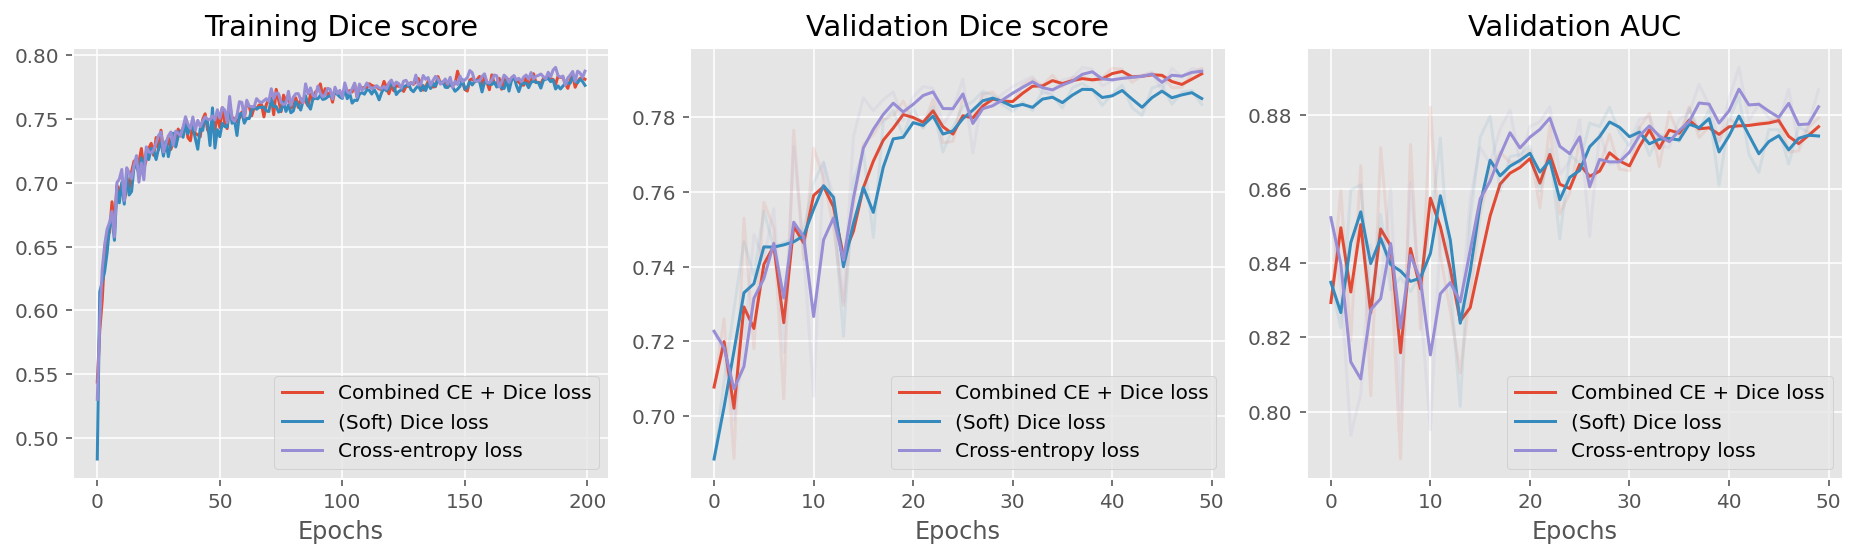

In [193]:
fig = plt.figure(figsize=(13, 4))
ax = fig.add_subplot(1, 3, 1)

for key, meth in labels.items():
    plt.plot(big_dico['Train_Dice'][key].Value, label=meth)
#plt.plot(big_dico['Train_Dice']['combinedLoss'].Value, label="Combined Loss")
#plt.plot(big_dico['Train_Dice']['diceLoss'].Value, label="(Soft) Dice Loss")
plt.title("Training Dice score")
#plt.ylim((0.15, 0.35))
plt.xlabel("Epochs")
plt.legend()

ax = fig.add_subplot(1, 3, 2)

#plt.plot(dfs[2].Value, label="Combined Loss")
#plt.plot(dfs[5].Value, label="(Soft) Dice Loss")
for key, meth in labels.items():
    plot_with_mov_avg(big_dico['Validation_Dice'][key].Value, ax, meth)
#plot_with_mov_avg(big_dico['Validation_Dice']['diceLoss'].Value, ax, "(Soft) Dice Loss")
plt.title("Validation Dice score")
# plt.ylim((0.68, 0.8))
plt.xlabel("Epochs")
plt.legend()

ax = fig.add_subplot(1, 3, 3)
#l, = plt.plot(dfs[1].Value, alpha=.1)
#plt.plot(expo_mov_avg(dfs[1]), label="Combined Loss", c=l.get_color())
for key, meth in labels.items():
    plot_with_mov_avg(big_dico['Validation_AUC'][key].Value, ax, meth)
#plot_with_mov_avg(big_dico['Validation_AUC']['combinedLoss'].Value, ax, "Combined Loss")
#plot_with_mov_avg(big_dico['Validation_AUC']['diceLoss'].Value, ax, "(Soft) Dice Loss")

plt.title("Validation AUC")
# plt.ylim((0.8, 0.9))
plt.xlabel("Epochs")
plt.legend()
plt.tight_layout()

plt.tight_layout()

In [194]:
fig.savefig(BASE_FOLDER+'/{:s}.pdf'.format("diceloss_crossentropy_combined_unet"))